In [1]:
# Project for Classififcation of FeedBack based on Communication Data
# importing libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading Excel file
SampleData1 = pd.read_excel('DA-1.xlsx', 'SampleData1',header=0)
SampleData2 = pd.read_excel('DA-1.xlsx', 'SampleData2',header=0)

# Merging 2 Sheets
SampleData = pd.merge(SampleData1,SampleData2)

In [3]:
############################################
#                                          #
#     2.1 Exploratory Data Analysis        #
#                                          #
############################################

###################################
#  2.1.1 understanding the data   #
###################################
#Checking few observation of dataset
SampleData.head()

,Id,Type,Date,CountA,CountB,CountC,FeedBack,User
0,10121,Email,2016-08-04 10:16:47,0.773005,0.662162,0.622776,Others,A1005
1,10122,Email,2016-08-04 10:18:28,0.193826,0.870958,0.328081,Others,A1002
2,10123,Email,2016-08-04 10:30:24,0.772299,0.322429,0.456233,Others,A1002
3,10124,Email,2016-08-04 10:41:56,0.485769,0.128755,0.575060,Others,A1002
4,10125,Email,2016-08-04 10:59:00,0.015268,0.216612,0.098125,Others,A1002


In [4]:
# looking at information of dataset -> see output
SampleData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 65
Data columns (total 8 columns):
Id          66 non-null int64
Type        64 non-null object
Date        66 non-null datetime64[ns]
CountA      66 non-null float64
CountB      66 non-null float64
CountC      66 non-null float64
FeedBack    64 non-null object
User        66 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 4.6+ KB


In [5]:
SampleData['Id'] = SampleData['Id'].astype('O')
SampleData1.shape, SampleData2.shape, SampleData.shape

((64, 7), (99, 2), (66, 8))

In [6]:
# looking at five point summary for our numerical variables
SampleData.describe()

,CountA,CountB,CountC
count,66.000000,66.000000,66.000000
mean,0.449231,0.487495,0.425085
std,0.288190,0.308335,0.270263
min,0.006013,0.001177,0.006691
25%,0.221218,0.217050,0.209038
50%,0.448362,0.544847,0.408826
75%,0.721173,0.723734,0.641617
max,0.981381,0.979509,0.976614


In [7]:
# counting of each unique values in each categorical variable
print("value counts of categorical column")
print()
for i in ['Type', 'User', 'FeedBack'] :
    print('## {} ## :- '.format(i))
    print(SampleData[i].value_counts())

value counts of categorical column

## Type ## :- 
Update    37
Email     19
Call       7
Visit      1
Name: Type, dtype: int64
## User ## :- 
A1003    22
A1001    18
A1002    15
A1004     8
A1005     3
Name: User, dtype: int64
## FeedBack ## :- 
Others        29
NC            15
nc            13
Undecided      2
UNDECIDED      2
undecided      1
undecided      1
NI             1
Name: FeedBack, dtype: int64


In [8]:
# Comparing observations for 'FeedBack' and 'Type'
SampleData.pivot_table(index='FeedBack', columns='Type',
                    aggfunc={'Id':'count'})

Id                   
Type       Call Email Update Visit
FeedBack                          
NC          NaN   NaN   15.0   NaN
NI          NaN   NaN    NaN   1.0
Others      7.0  19.0    1.0   NaN
UNDECIDED   NaN   NaN    2.0   NaN
Undecided   NaN   NaN    2.0   NaN
nc          NaN   NaN   13.0   NaN
undecided   NaN   NaN    1.0   NaN
undecided   NaN   NaN    1.0   NaN

In [9]:
###################################
#  2.1.2 Missing value analysis   #
###################################
    
# checking for missing values in dataset
for i in SampleData.columns :
    print(i, SampleData[i].isnull().sum())   

Id 0
Type 2
Date 0
CountA 0
CountB 0
CountC 0
FeedBack 2
User 0


In [10]:
# filling NaN values in FeedBack
t = pd.Series(SampleData['FeedBack'])
SampleData['FeedBack'] = t.fillna('NC')
SampleData.tail()

,Id,Type,Date,CountA,CountB,CountC,FeedBack,User
61,10215,Update,2016-08-04 17:44:26,0.120787,0.825996,0.921125,NC,A1002
62,10216,Email,2016-08-04 17:44:37,0.035465,0.372469,0.171791,Others,A1004
63,10217,Update,2016-08-04 18:07:52,0.732037,0.056563,0.378631,NC,A1004
64,10218,Email,2016-08-04 19:04:04,0.827226,0.816243,0.380863,Others,A1001
65,10219,Update,2016-08-04 19:04:15,0.637355,0.075972,0.120304,Undecided,A1002


In [11]:
# Cleaning the FeedBack Data
for i in range(SampleData.shape[0]) :
    if SampleData.ix[i,'FeedBack'] == 'UNDECIDED':
        SampleData.ix[i,'FeedBack'] = 'IN'
    elif SampleData.ix[i,'FeedBack'] == 'undecided':
        SampleData.ix[i,'FeedBack'] = 'IN'
    elif SampleData.ix[i,'FeedBack'] == 'undecided ':
        SampleData.ix[i,'FeedBack'] = 'IN'
    elif SampleData.ix[i,'FeedBack'] == 'Undecided':
        SampleData.ix[i,'FeedBack'] = 'IN'
    elif SampleData.ix[i,'FeedBack'] == 'nc':
        SampleData.ix[i,'FeedBack'] = 'NC'
    elif SampleData.ix[i,'FeedBack'] == 'Others':
        SampleData.ix[i,'FeedBack'] = 'NC'
    elif SampleData.ix[i,'FeedBack'] == 'NI':
        SampleData.ix[i,'FeedBack'] = 'NC'
SampleData['FeedBack'].value_counts()
#SampleData.pivot_table(index='FeedBack', columns='Type', aggfunc={'Type':'count'})

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


NC    60
IN     6
Name: FeedBack, dtype: int64

In [12]:
# Cleaning the Type Data
for i in range(SampleData.shape[0]) :
    if SampleData.ix[i,'Type'] == 'Update':
        if SampleData.ix[i,'FeedBack'] == 'NC':
            SampleData.ix[i,'Type'] = 'Email'
    if SampleData.ix[i,'Type'] == 'Update':
        if SampleData.ix[i,'FeedBack'] == 'IN':
            SampleData.ix[i,'Type'] = 'Call'

In [13]:
# filling NaN value in Type variable
l = pd.Series(SampleData['Type'])
SampleData['Type'] = l.fillna(method = 'ffill')
SampleData.tail()

,Id,Type,Date,CountA,CountB,CountC,FeedBack,User
61,10215,Email,2016-08-04 17:44:26,0.120787,0.825996,0.921125,NC,A1002
62,10216,Email,2016-08-04 17:44:37,0.035465,0.372469,0.171791,NC,A1004
63,10217,Email,2016-08-04 18:07:52,0.732037,0.056563,0.378631,NC,A1004
64,10218,Email,2016-08-04 19:04:04,0.827226,0.816243,0.380863,NC,A1001
65,10219,Call,2016-08-04 19:04:15,0.637355,0.075972,0.120304,IN,A1002


In [14]:
###################################
### 2.1.3 Visualising Data        #
###################################

In [15]:
############################################
#  3.1 Create the summary table (DA1.png): #        
############################################

SampleData.groupby('User')[['CountA','CountB','CountC']].mean()

,CountA,CountB,CountC
User,,,
A1001,0.514366,0.632827,0.405684
A1002,0.396569,0.332355,0.375910
A1003,0.465083,0.554160,0.485652
A1004,0.309543,0.250032,0.331924
A1005,0.577985,0.535551,0.591643


Text(0.5,0,'CountC')

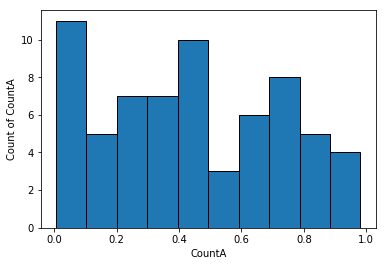

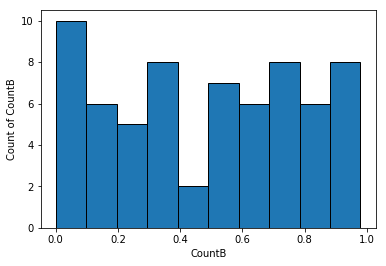

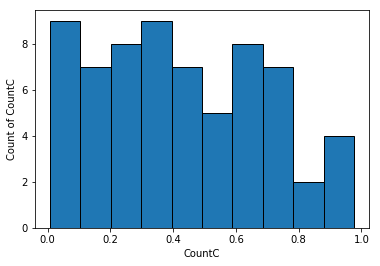

In [16]:
# Histogram
plt.figure()
plt.hist(SampleData['CountA'], alpha = 1, edgecolor = 'black')
plt.ylabel('Count of CountA')
plt.xlabel('CountA')

plt.figure()
plt.hist(SampleData['CountB'], alpha = 1, edgecolor = 'black')
plt.ylabel('Count of CountB')
plt.xlabel('CountB')

plt.figure()
plt.hist(SampleData['CountC'], alpha = 1, edgecolor = 'black')
plt.ylabel('Count of CountC')
plt.xlabel('CountC')

Text(0.5,0,'FeedBack')

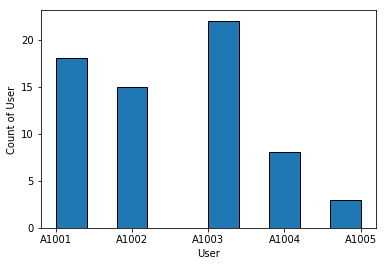

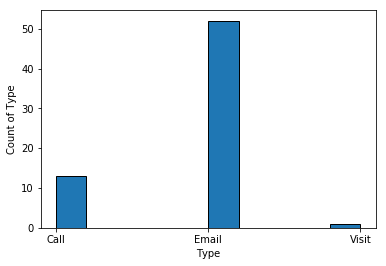

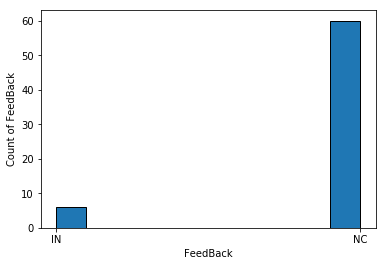

In [17]:
# Histogram
plt.figure()
plt.hist(SampleData['User'], alpha = 1, edgecolor = 'black')
plt.ylabel('Count of User')
plt.xlabel('User')

plt.figure()
plt.hist(SampleData['Type'], alpha = 1, edgecolor = 'black')
plt.ylabel('Count of Type')
plt.xlabel('Type')

plt.figure()
plt.hist(SampleData['FeedBack'], alpha = 1, edgecolor = 'black')
plt.ylabel('Count of FeedBack')
plt.xlabel('FeedBack')

Text(0,0.5,'CountB')

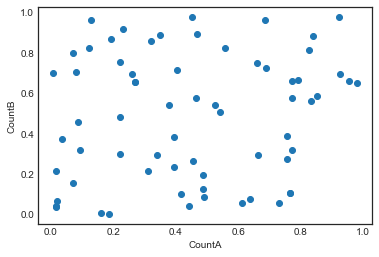

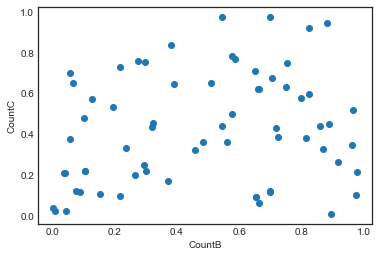

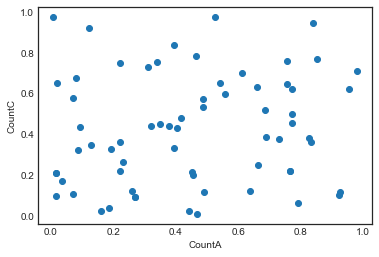

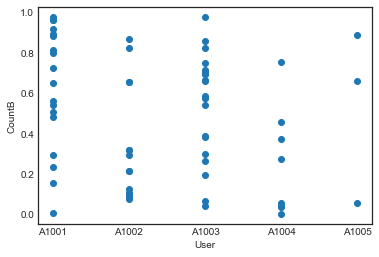

In [18]:
# Scatter Plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

plt.figure()
plt.plot(SampleData['CountA'],SampleData['CountB'],'o')
plt.xlabel('CountA')
plt.ylabel('CountB')

plt.figure()
plt.plot(SampleData['CountB'],SampleData['CountC'],'o')
plt.xlabel('CountB')
plt.ylabel('CountC')

plt.figure()
plt.plot(SampleData['CountA'],SampleData['CountC'],'o')
plt.xlabel('CountA')
plt.ylabel('CountC')

plt.figure()
plt.plot(SampleData['User'],SampleData['CountB'],'o')
plt.xlabel('User')
plt.ylabel('CountB')

Text(0,0.5,'CountB')

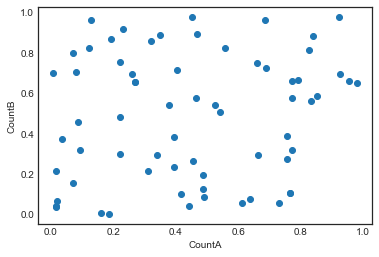

In [19]:
# Scatter Plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

plt.figure()
plt.plot(SampleData['CountA'],SampleData['CountB'],'o')
plt.xlabel('CountA')
plt.ylabel('CountB')

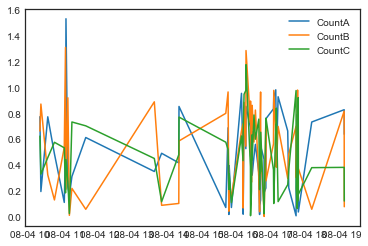

In [20]:
# Line Chart
d = SampleData.pivot_table(index='Date',aggfunc={'CountA':sum})
d = d.reset_index()
plt.plot(d['Date'],d['CountA'])
d = SampleData.pivot_table(index='Date',aggfunc={'CountB':sum})
d = d.reset_index()
plt.plot(d['Date'],d['CountB'])
d = SampleData.pivot_table(index='Date',aggfunc={'CountC':sum})
d = d.reset_index()
plt.plot(d['Date'],d['CountC'])
plt.legend()

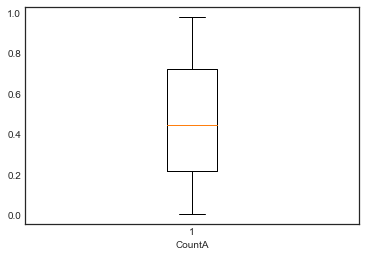

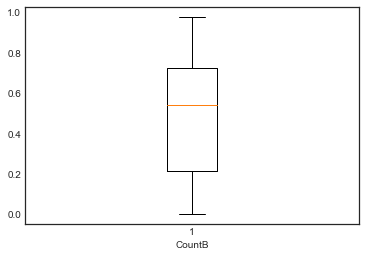

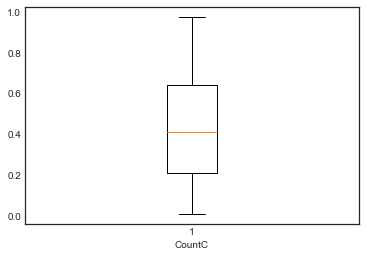

In [21]:
# Boxplot for Outlier Analysis
num_var = ['CountA', 'CountB', 'CountC']
for i in num_var:
    plt.figure()
    plt.boxplot(SampleData[i])
    plt.xlabel(i)

In [22]:
# Dropping Id and Date Variable
# Date Variable will be used in Feature Engineering
temp1 = SampleData.copy()
SampleData = SampleData.drop(['Date','Id'],axis=1)

In [23]:
# Converting Categorical to levels
from fancyimpute import KNN
temp = SampleData.copy()
for i in range(temp.shape[1]) :
    if(temp.iloc[:,i].dtypes == 'object') :
        temp.iloc[:,i] = pd.Categorical(temp.iloc[:,i])
        temp.iloc[:,i] = temp.iloc[:,i].cat.codes
SampleData = temp

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [24]:
'''
for i in range(0,temp.shape[1]):
    temp.iloc[:,i] = temp.iloc[:,i].replace(-1,np.nan)
temp = pd.DataFrame(KNN(k=3).complete(temp),columns  = temp.columns)
SampleData = temp
for i in SampleData.columns :
    print(i, SampleData[i].isnull().sum())
'''

'\nfor i in range(0,temp.shape[1]):\n    temp.iloc[:,i] = temp.iloc[:,i].replace(-1,np.nan)\ntemp = pd.DataFrame(KNN(k=3).complete(temp),columns  = temp.columns)\nSampleData = temp\nfor i in SampleData.columns :\n    print(i, SampleData[i].isnull().sum())\n'

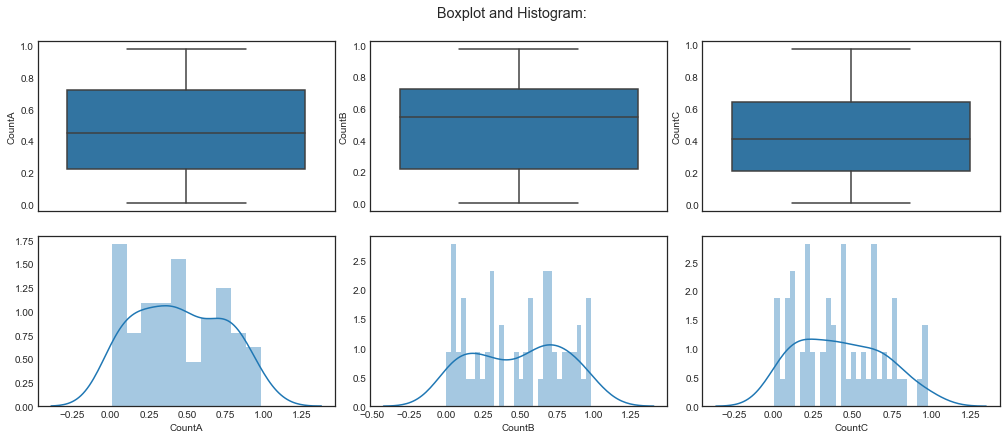

In [25]:
###################################
#  2.1.4 outlier analysis         #
###################################
###################################
# user defined function that will plot boxplot and histogram for four columns
def hist_and_box_plot(col1, col2, col3, data, bin1=30, bin2=30, bin3=30, bin4 = 30, sup =""):
    fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize= (14,6))
    super_title = fig.suptitle("Boxplot and Histogram: "+sup,fontsize='x-large')
    plt.tight_layout()
    sns.boxplot(y = col1, data = data, ax = ax[0][0])
    sns.boxplot(y = col2,data = data, ax = ax[0][1])
    sns.boxplot(y = col3, data = data, ax = ax[0][2])
    sns.distplot(data[col1], ax = ax[1][0], bins = bin1)
    sns.distplot(data[col2], ax = ax[1][1], bins = bin2)
    sns.distplot(data[col3], ax = ax[1][2], bins = bin3)
    fig.subplots_adjust(top = 0.90)
    plt.show()
# plotting boxplot and histogram for our numerical variables
hist_and_box_plot('CountA', 'CountB', 'CountC', bin1 = 10, data = SampleData)

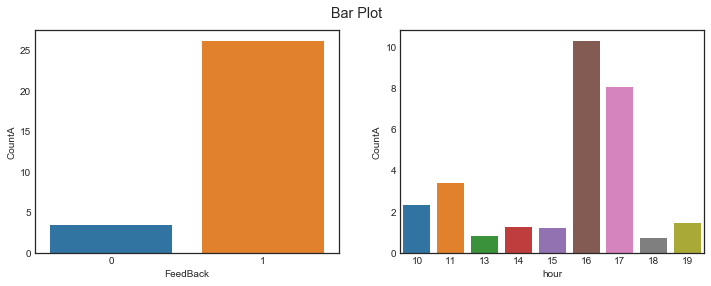

In [26]:
###################################
#  2.1.4 Feature Engineering      #
###################################

from datetime import datetime
SampleData['hour'] = temp1['Date'].dt.hour

# user defined function to plot bar plot of a column for each y i.e. y1 and y2 wrt 
# unique variables of each x i.e. x1 and x2
# X1 and X2 would be categorical variable, y1 and y2 would be continuous
# this funciton will plot barplot for y1 column for each unique values of x1 and 
# will do barplot for y2 for each unique values of x2 and method could be mean,sum etc.
def plot_bar(x1, y1,x2, y2, method = 'sum'):
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize= (12,4), squeeze=False)
    super_title = fig.suptitle("Bar Plot ",  fontsize='x-large')
    if(method == 'mean'):
        gp = SampleData.groupby(by = x1).mean()
        gp2 = SampleData.groupby(by = x2).mean()
    else:
        gp = SampleData.groupby(by = x1).sum()
        gp2 = SampleData.groupby(by = x2).sum()
    gp = gp.reset_index()
    gp2 = gp2.reset_index()
    sns.barplot(x= x1, y = y1, data = gp, ax=ax[0][0])
    sns.barplot(x= x2, y = y2, data = gp2, ax=ax[0][1])
    fig.subplots_adjust(top = 0.90)
    plt.show()
	

# plotting barplot for count i.e. cnt wrt to yr and month
plot_bar('FeedBack', 'CountA', 'hour', 'CountA')

In [27]:
# Creating categorical variable time_of_day from hour data variable
for i in range(SampleData.shape[0]):
    if SampleData.ix[i,'hour'] < 12 :
        SampleData.ix[i,'time_of_day'] = 'Morning'
    elif SampleData.ix[i,'hour'] <= 17 :
        SampleData.ix[i,'time_of_day'] = 'Afternoon'
    else :
        SampleData.ix[i,'time_of_day'] = 'Night'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,0,'time_of_day')

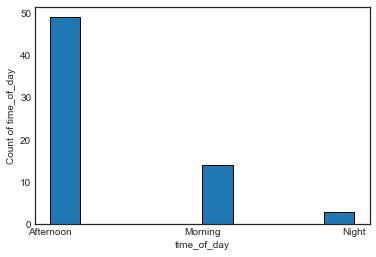

In [28]:
plt.figure()
plt.hist(SampleData['time_of_day'], alpha = 1, edgecolor = 'black')
plt.ylabel('Count of time_of_day')
plt.xlabel('time_of_day')

In [29]:
SampleData.loc[:,'time_of_day'] = pd.Categorical(SampleData.loc[:,'time_of_day'])
SampleData.loc[:,'time_of_day'] = SampleData.loc[:,'time_of_day'].cat.codes

In [30]:
# Dummy Variable Creation
num_var = ['CountA','CountB', 'CountC','hour']
cat_var = ['Type'] # Dropped as per chi-sq test ['User','time_of_day'] 
df1 = SampleData.applymap(int)
for i in cat_var:
    df1[i].astype('str')
temp1 = pd.DataFrame(df1['FeedBack'])
temp1 = temp1.join(SampleData[num_var])
for i in cat_var:
    d = pd.get_dummies(df1[i],prefix = i)
    temp1 = temp1.join(d)
data_hotencod = temp1
data_hotencod.shape,data_hotencod.columns

((66, 8),
 Index(['FeedBack', 'CountA', 'CountB', 'CountC', 'hour', 'Type_0', 'Type_1',
        'Type_2'],
       dtype='object'))

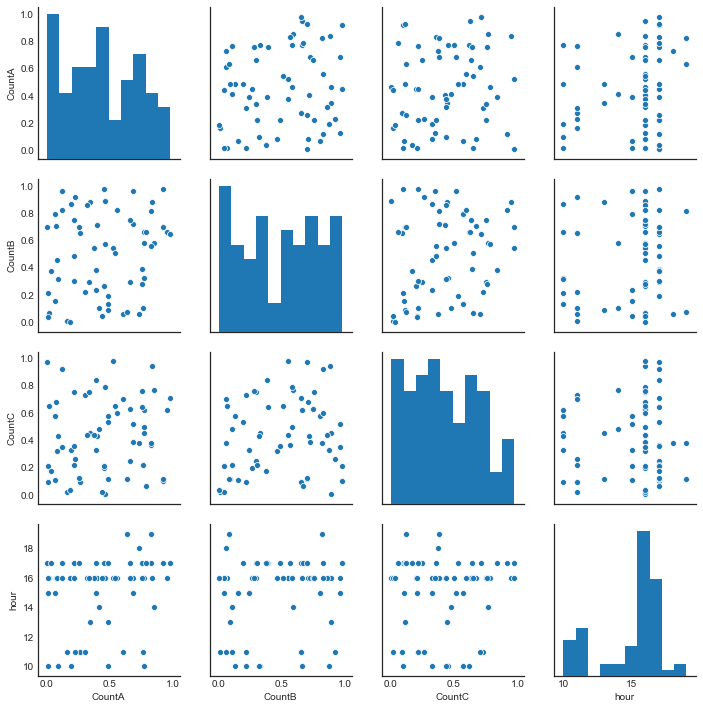

In [31]:
# let us look at correlation plot for each numerical variables  
num_var = ['CountA','CountB','CountC','hour']
sns.pairplot(data_hotencod[num_var])

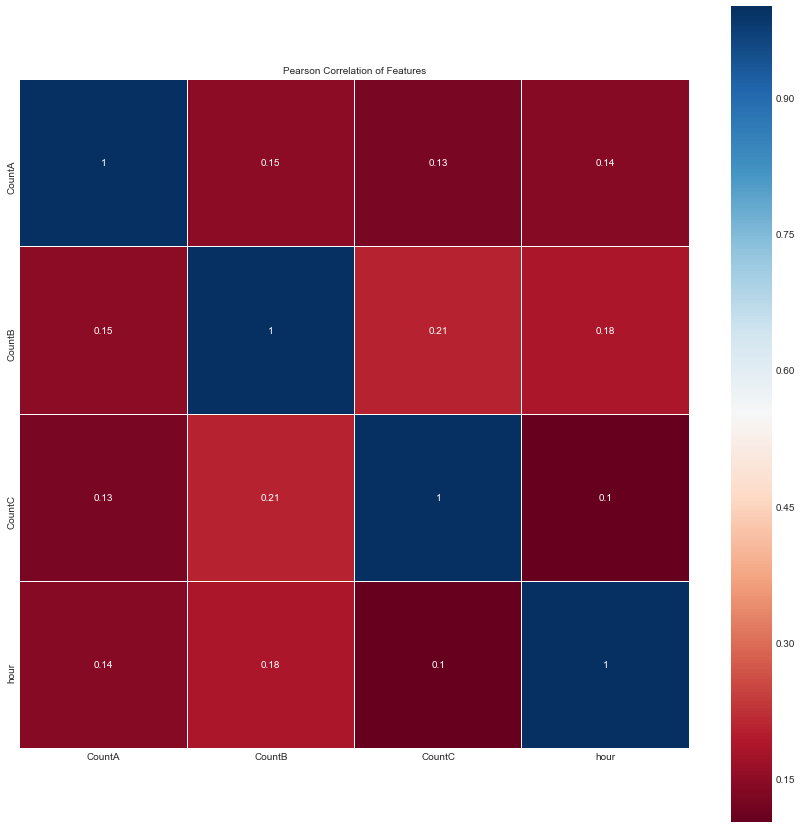

In [32]:
#correlation plot
num_var = ['CountA','CountB','CountC','hour']
data_corr = SampleData.loc[:,num_var]
#f,ax = plt.subplots(figsize = (7,5))
corr = data_corr.corr()

colormap = plt.cm.RdBu
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of Features', y=1.0, size=10)
sns.heatmap(data_corr.corr(),linewidths=0.2,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [33]:
# checking dependency between FeedBack and independent variable (category)
cat_var = ['Type','User','time_of_day']
from scipy.stats import chi2_contingency
print("Chi-square - test of independence")
print("=================================")
for i in cat_var:
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(SampleData['FeedBack'], SampleData[i]))
    print("p-value between FeedBack and {}".format(i))
    print(p)
    print('----------------------------')

Chi-square - test of independence
p-value between FeedBack and Type
1.4357170403764882e-06
----------------------------
p-value between FeedBack and User
0.9621643388283516
----------------------------
p-value between FeedBack and time_of_day
0.32487339451373193
----------------------------


In [34]:
# checking independency between independent variables
chi2, p, dof, ex = chi2_contingency(pd.crosstab(SampleData['Type'],
                                                SampleData['User']))
print("p-value between 'Type' and 'User'")
print(p)
print('----------------------------')

# checking independency between independent variables
chi2, p, dof, ex = chi2_contingency(pd.crosstab(SampleData['Type'],
                                               SampleData['time_of_day']))
print("p-value between 'Type'  and 'time_of_day'")
print(p)
print('----------------------------')

# checking independency between independent variables
chi2, p, dof, ex = chi2_contingency(pd.crosstab(SampleData['User'],
                                               SampleData['time_of_day']))
print("p-value between 'User'  and 'time_of_day'")
print(p)
print('----------------------------')

p-value between 'Type' and 'User'
0.19069180044021652
----------------------------
p-value between 'Type'  and 'time_of_day'
0.6602313428432385
----------------------------
p-value between 'User'  and 'time_of_day'
2.900514047022734e-05
----------------------------


In [35]:
# checking importance of feature
drop_col = ['User','time_of_day','FeedBack']
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=200)
X = SampleData.drop(columns= drop_col)
y = SampleData['FeedBack']
clf.fit(X, y)
imp_feat = pd.DataFrame({'Feature': SampleData.drop(columns=drop_col).columns,
                         'importance':clf.feature_importances_})
imp_feat.sort_values(by = 'importance', ascending=False).reset_index(drop = True)


,Feature,importance
0,Type,0.434280
1,CountA,0.179720
2,CountB,0.139154
3,CountC,0.124393
4,hour,0.122454


In [36]:
# Checking VIF values of numeric columns
from statsmodels.stats.outliers_influence import variance_inflation_factor as vf
from statsmodels.tools.tools import add_constant
numeric_df = add_constant(SampleData[num_var])
vif = pd.Series([vf(numeric_df.values, i) for i in range(numeric_df.shape[1])], 
                 index = numeric_df.columns)
vif.round(1) 

const     37.9
CountA     1.0
CountB     1.1
CountC     1.1
hour       1.1
dtype: float64

In [37]:
'''
# Feature Scaling
# Not Requireed_see explanation in Report
for i in num_var:
   data_hotencod[i]  = (data_hotencod[i] - min(data_hotencod[i]))/(max(data_hotencod[i]) - min(data_hotencod[i]))
'''

'\n# Feature Scaling\n# Not Requireed_see explanation in Report\nfor i in num_var:\n   data_hotencod[i]  = (data_hotencod[i] - min(data_hotencod[i]))/(max(data_hotencod[i]) - min(data_hotencod[i]))\n'

In [38]:
# splitting in X and y for train and test
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_hotencod.iloc[:,1:8],data_hotencod.iloc[:,0], test_size=0.2,
                                                    random_state=42)

In [39]:
############################################
#                                          #
#                                          #
#   2.2.2 Building Classification models   #
#                                          #
#                                          #
############################################

# making general function to fit and predict result (Confusion Matrix) 
# and performance (K-fold CV) and to not to repeat code everytime
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
def fit_predict_show_performance(classifier, X_train, y_train):
    '''
    this function will fit on data passed in argument then it will predict on
    X_test datasetand then will calculate the 10 fold CV accuracy score and then will 
    generate classification report and confusion matrix based on prediction and y_test
    it will only print result, to get all calculated result, uncomment last line and 
    call it like below example:
    y_pred, cr, cm = fit_predict_show_performance(classifier, X_train, y_train)
    '''
    # fitting model
    classifier.fit(X_train, y_train)
    prediction = classifier.predict(X_test)
    # getting K-fold CV scores for K = 10
    ten_performances = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
    k_fold_performance = ten_performances.mean()
    print("K-fold cross validation score of model for k = 10 is :")
    print(k_fold_performance)
    print("====================================")
    print("====== Classification Report ======= ")
    cr = classification_report(y_test,prediction)
    print(cr)
    print("====== Confusion matrix ======= ")
    cm = confusion_matrix(y_test,prediction)
    print(cm)
    #return [prediction, cr, cm]


In [40]:
#########################
#  Logistic Regression  #
#########################
    
# Building Logistic Regression-> see output
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
fit_predict_show_performance(classifier, X_train, y_train)

K-fold cross validation score of model for k = 10 is :
0.9166666666666667
====== Classification Report ======= 
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.93      1.00      0.96        13

avg / total       0.86      0.93      0.89        14

====== Confusion matrix ======= 
[[ 0  1]
 [ 0 13]]


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [41]:
#########################
#       KNN             #
#########################
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',p =2)
fit_predict_show_performance(classifier, X_train, y_train)

K-fold cross validation score of model for k = 10 is :
0.9016666666666667
====== Classification Report ======= 
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.92      0.85      0.88        13

avg / total       0.85      0.79      0.82        14

====== Confusion matrix ======= 
[[ 0  1]
 [ 2 11]]


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [42]:
#########################
#     Naive Bayes       #
#########################-> see output
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
fit_predict_show_performance(classifier, X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


K-fold cross validation score of model for k = 10 is :
0.9183333333333333
====== Classification Report ======= 
             precision    recall  f1-score   support

          0       0.20      1.00      0.33         1
          1       1.00      0.69      0.82        13

avg / total       0.94      0.71      0.78        14

====== Confusion matrix ======= 
[[1 0]
 [4 9]]


In [43]:
#########################
#    Decision Tree      #
#########################-> see output
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state=1)
fit_predict_show_performance(classifier, X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


K-fold cross validation score of model for k = 10 is :
0.9216666666666666
====== Classification Report ======= 
             precision    recall  f1-score   support

          0       0.33      1.00      0.50         1
          1       1.00      0.85      0.92        13

avg / total       0.95      0.86      0.89        14

====== Confusion matrix ======= 
[[ 1  0]
 [ 2 11]]


In [44]:
#########################
#    Random Forest      #
#########################-> see output
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',
                                          random_state=1)
fit_predict_show_performance(classifier, X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


K-fold cross validation score of model for k = 10 is :
0.925
====== Classification Report ======= 
             precision    recall  f1-score   support

          0       0.33      1.00      0.50         1
          1       1.00      0.85      0.92        13

avg / total       0.95      0.86      0.89        14

====== Confusion matrix ======= 
[[ 1  0]
 [ 2 11]]


In [46]:
############################################
#                                          #
#                                          #
#        Hyperparameter tuning             #
#                                          #
#                                          #
############################################
#########################################
#                                       #
# tuning decision tree for dataset #
#                                       #
#########################################

# hyperparameter tuning for Decision tree classifier
from sklearn.model_selection import GridSearchCV
classifier = DecisionTreeClassifier(random_state=1)
params = [{'criterion':['entropy', 'gini'],
          'max_depth':[6,8,10,12,20],'class_weight':['balanced',{0:0.45, 1:0.55}, 
                      {0:0.55,1:0.45},{0:0.40,1:0.60}],'random_state' :[1]}]
grid_search = GridSearchCV(estimator=classifier, param_grid=params,
                          scoring = 'f1', cv = 10, n_jobs=-1)

# tuning Decision Tree for dataset-> see output
grid_search = grid_search.fit(X_train, y_train)
grid_search.best_params_

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 6,
 'random_state': 1}

In [47]:
#Decision tree classifier
#from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', 
                                          class_weight='balanced',max_depth=6,
                                          random_state=1)
fit_predict_show_performance(classifier, X_train, y_train)

K-fold cross validation score of model for k = 10 is :
0.9383333333333332
====== Classification Report ======= 
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.90      0.69      0.78        13

avg / total       0.84      0.64      0.73        14

====== Confusion matrix ======= 
[[0 1]
 [4 9]]


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [48]:
############ Hyperparameter tuning for Random Forest #############
# Grid search for finding best parameter for random_forest 
classifier = RandomForestClassifier(random_state=1)
params=[{'criterion':['entropy', 'gini'],'n_estimators':[800,1000],
         'max_depth': [8, 10, 12], 'class_weight':['balanced', {0:0.45, 1:0.55},
                      {0:0.55, 1:0.45}],'random_state' :[1]}]
grid_search = GridSearchCV(estimator=classifier, param_grid=params,
                          scoring = 'f1', cv = 10, n_jobs=-1)
grid_search = grid_search.fit(X_train, y_train)
grid_search.best_params_

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 8,
 'n_estimators': 800,
 'random_state': 1}

In [49]:
# tuned randomforest model 
classifier = RandomForestClassifier(n_estimators = 800, criterion = 'entropy',
                                          class_weight='balanced',max_depth=8,
                                          random_state=1)
fit_predict_show_performance(classifier, X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


K-fold cross validation score of model for k = 10 is :
0.925
====== Classification Report ======= 
             precision    recall  f1-score   support

          0       0.20      1.00      0.33         1
          1       1.00      0.69      0.82        13

avg / total       0.94      0.71      0.78        14

====== Confusion matrix ======= 
[[1 0]
 [4 9]]


In [50]:
############################################
#                                          #
#    SMOTE + Tomek (Oversampling)          #
#         Balancing Target                 #
#                                          #
############################################

# resmapling data 
from imblearn.combine import SMOTETomek
smt = SMOTETomek()
#X_resampled, y_resampled = smt.fit_sample((X_train), (y_train))
X_resampled, y_resampled = smt.fit_sample(data_hotencod.iloc[:,1:8], data_hotencod.iloc[:,0])

# checking shape of data after resampling
print(X_resampled.shape)
print(y_resampled.shape)
print("class proportion")
print(pd.Series(y_resampled).value_counts(normalize = True))

(118, 7)
(118,)
class proportion
1    0.5
0    0.5
dtype: float64


In [51]:
# tuning Random forest model for resampled data
classifier = RandomForestClassifier(random_state=1)
params = [{'criterion':['entropy','gini'],'n_estimators':[600, 800, 1000],
          'max_depth': [24, 26, 28], 'random_state' :[1],
          'class_weight':['balanced', {0:0.45, 1:0.55},{0:0.55, 1:0.45}]}]
grid_search = GridSearchCV(estimator=classifier, param_grid=params,
                          scoring = 'f1', cv = 10, n_jobs=-1)
grid_search = grid_search.fit(X_resampled, y_resampled)
grid_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 24,
 'n_estimators': 600,
 'random_state': 1}

In [52]:
# building Random Forest model on tuned parameter
classifier = RandomForestClassifier(n_estimators = 600, criterion = 'entropy',
                                          class_weight='balanced',
                                          max_depth=24,random_state=1)
fit_predict_show_performance(classifier, X_resampled, y_resampled)

K-fold cross validation score of model for k = 10 is :
0.9833333333333332
====== Classification Report ======= 
             precision    recall  f1-score   support

          0       0.50      1.00      0.67         1
          1       1.00      0.92      0.96        13

avg / total       0.96      0.93      0.94        14

====== Confusion matrix ======= 
[[ 1  0]
 [ 1 12]]
